In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv("./dataset/Dataset salary 2024.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [70]:
df.shape

(16534, 11)

In [71]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [72]:
df.duplicated().sum()

np.int64(6421)

### Remove duplicate data

In [73]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [74]:
df = df.reset_index(drop=True)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
10108,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
10109,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
10110,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
10111,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


### understand work year

In [75]:
df['work_year'].unique()

array([2024, 2022, 2023, 2020, 2021])

In [76]:
df['work_year'].value_counts()

work_year
2023    4632
2024    4074
2022    1116
2021     216
2020      75
Name: count, dtype: int64

### Retalition between salary and year

In [77]:
df['work_year'].unique()

array([2024, 2022, 2023, 2020, 2021])

In [78]:
df['work_year'].corr(df['salary_in_usd'])

np.float64(0.10235355347527547)

In [79]:
def print_histogram(year):
    new_df = df[df['work_year'] == year]
    # new_df['salary_in_usd'].describe()

    plt.figure(figsize=(10,5))
    plt.hist(new_df['salary_in_usd'], bins=30)
    plt.xlabel("Salary")
    plt.ylabel("Frequency")
    plt.title(f"Salary Distribution for {year}")
    plt.show()

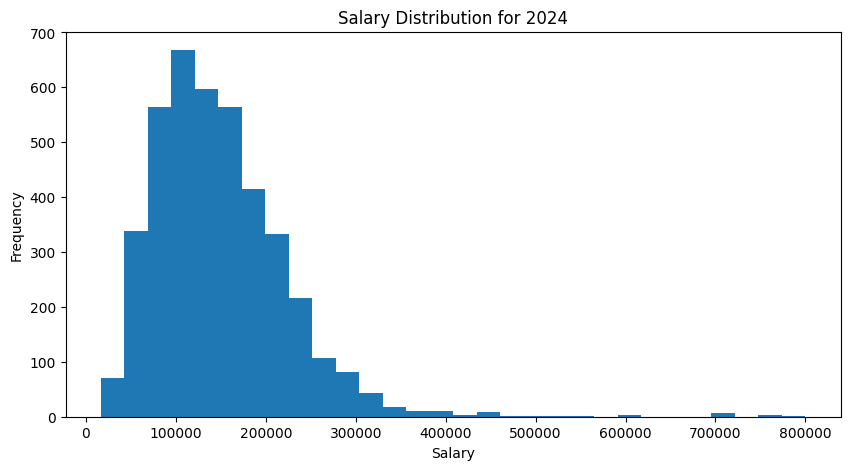

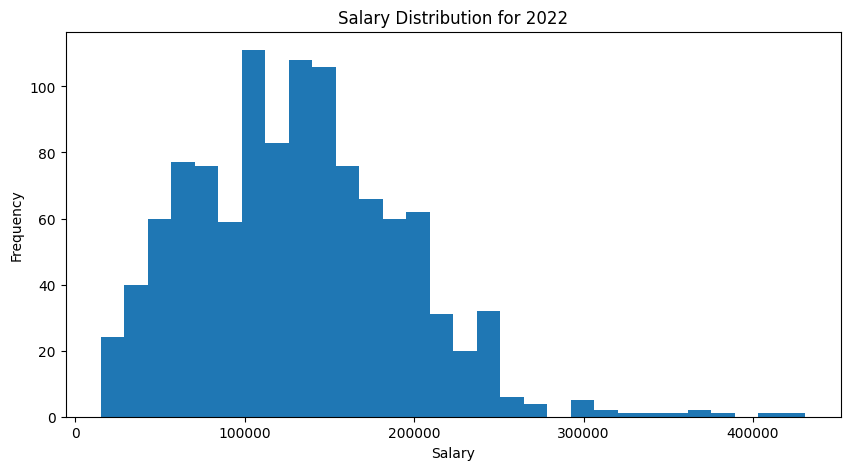

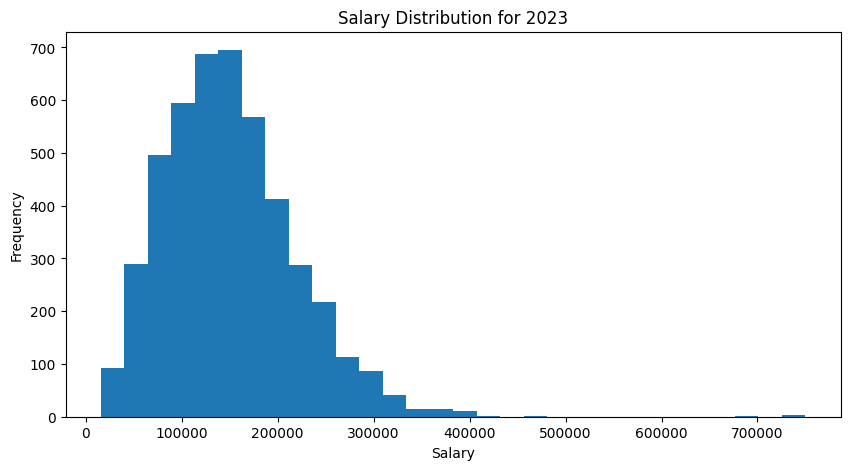

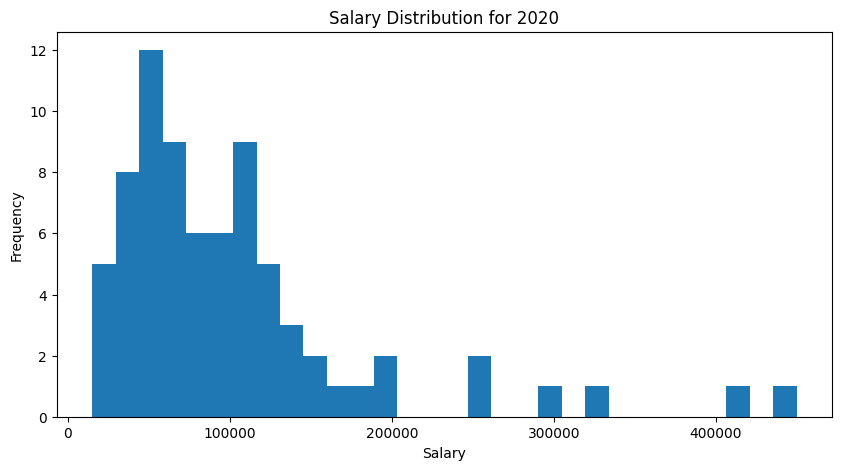

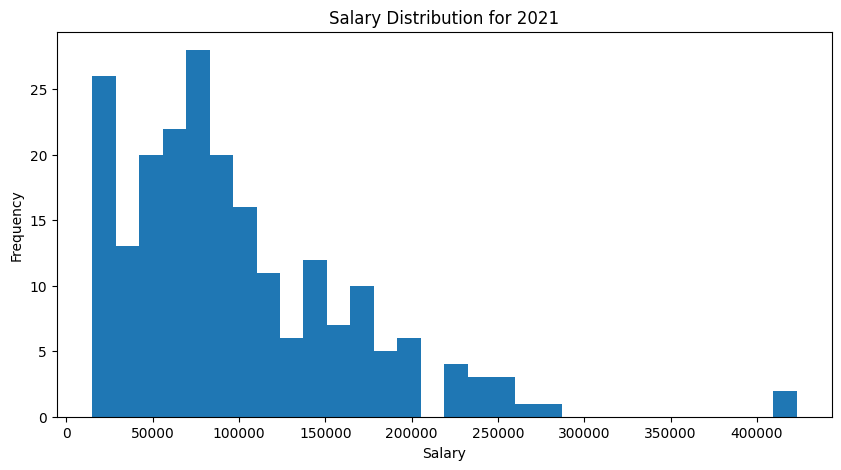

In [80]:
for i in df['work_year'].unique():
    print_histogram(i)

### remove outlier

In [81]:
# we can see that salary above 300000 is rear and we can ignore it 
df  = df[df['salary_in_usd'] < 300000]

### Understand experience_level

In [82]:
df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

- EN -> entry level
- MI -> mid level
- SE -> Senior level
- EX -> Executive level

In [83]:
df['experience_level'].value_counts()

experience_level
SE    5747
MI    2718
EN    1007
EX     358
Name: count, dtype: int64

### relation betweem salary and exp level

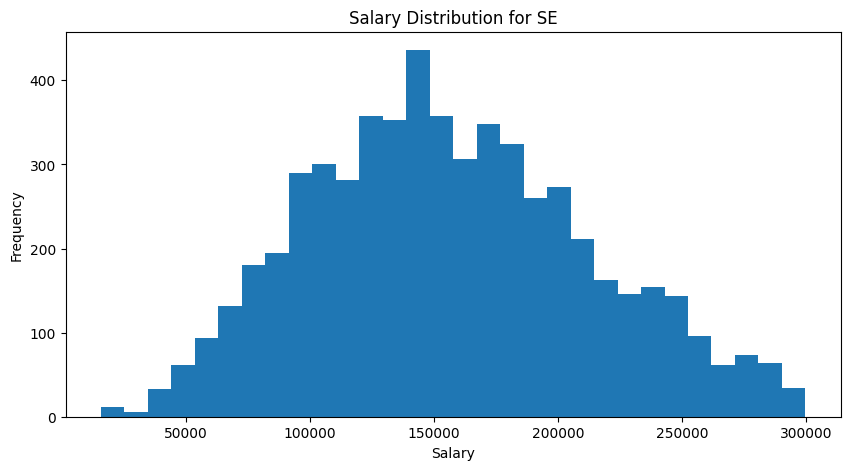

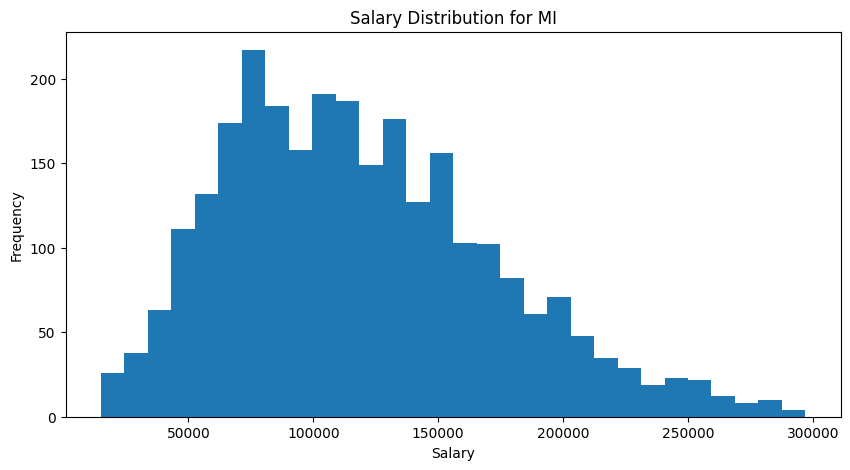

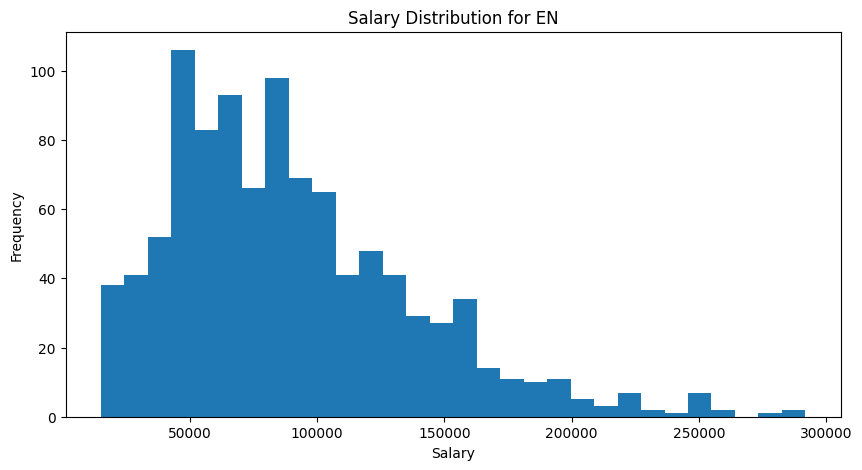

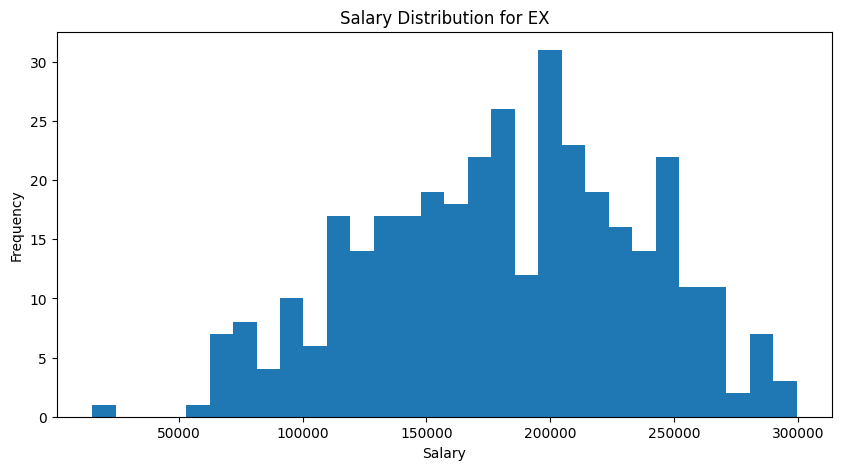

In [84]:
def print_histogram(exp):
    new_df = df[df['experience_level'] == exp]
    # new_df['salary_in_usd'].describe()

    plt.figure(figsize=(10,5))
    plt.hist(new_df['salary_in_usd'], bins=30)
    plt.xlabel("Salary")
    plt.ylabel("Frequency")
    plt.title(f"Salary Distribution for {exp}")
    plt.show()

for i in df['experience_level'].unique():
    print_histogram(i)

### understand employment_type

In [85]:
df['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

- FT -> full time
- PT -> part time
- CT -> contract
- FL -> freelance

In [86]:
df['employment_type'].value_counts()

employment_type
FT    9752
PT      38
CT      26
FL      14
Name: count, dtype: int64

> we might not able to pridict the sallary for PT, CT, FL as we dont have enough data compare to FT 

### understand job_title

In [87]:
df['job_title'].unique().shape

(153,)

we have 155 diffrent job_title

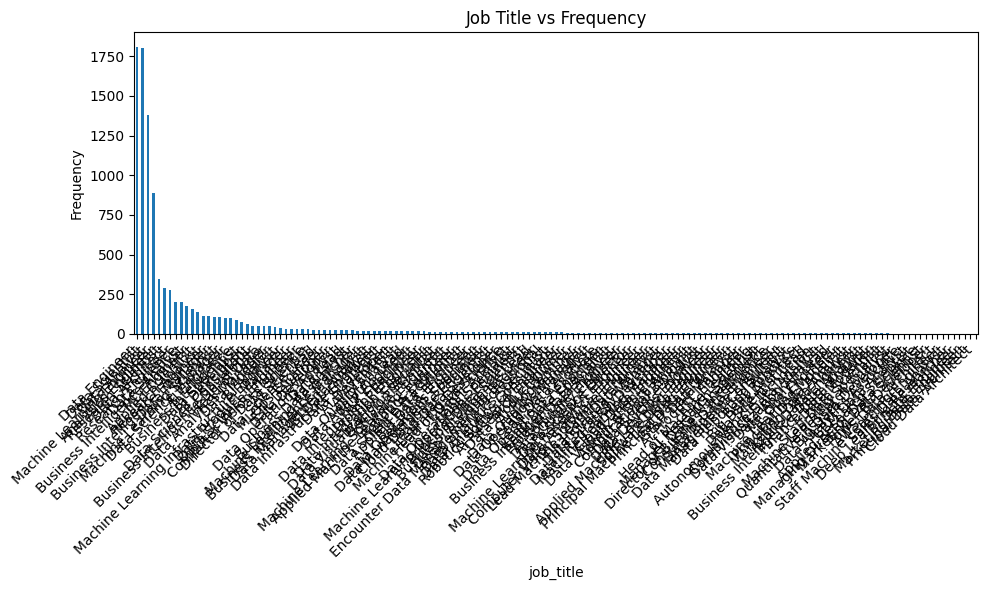

In [88]:
job_counts = df['job_title'].value_counts()

plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar')
# plt.xlabel("Job Title")
plt.ylabel("Frequency")
plt.title("Job Title vs Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# plt.show()

In [89]:
job_counts.describe()

count     153.000000
mean       64.248366
std       245.124439
min         1.000000
25%         2.000000
50%         8.000000
75%        23.000000
max      1811.000000
Name: count, dtype: float64

In [90]:
df['job_title'].unique()

array(['AI Engineer', 'Data Engineer', 'Machine Learning Engineer',
       'ML Engineer', 'Data Analyst', 'NLP Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Manager', 'Data Architect',
       'Data Operations Manager', 'Research Scientist',
       'Data Science Manager', 'Business Intelligence Engineer',
       'Business Intelligence', 'Data Modeler',
       'Data Integration Specialist', 'Data Product Manager',
       'Data Visualization Specialist', 'Data Science', 'Data Specialist',
       'Business Intelligence Lead', 'Research Analyst',
       'Business Intelligence Analyst', 'AI Software Engineer',
       'Machine Learning Scientist', 'Data Science Engineer',
       'Machine Learning Operations Engineer', 'Analytics Engineer',
       'Data Management Analyst',
       'Encounter Data Management Professional',
       'Data Analytics Specialist', 'Head of Data', 'Data Analytics Lead',
       'Research Engineer', 'AI Scientist',
       'Business Intelligence Develope

groupig the job_title into jon_category

In [91]:
def categorize_job(title):
    title = title.lower()

    if "scientist" in title or "research" in title:
        return "Data Science"

    if "machine learning" in title or "ml" in title or "ai" in title or "vision" in title or "deep learning" in title:
        return "ML / AI Engineering"

    if "analyst" in title:
        return "Data Analysis"

    if "engineer" in title:
        return "Data Engineering"

    if "bi" in title or "business intelligence" in title:
        return "Business Intelligence"

    if "architect" in title:
        return "Data Architecture"

    if "operations" in title or "quality" in title or "management" in title:
        return "Data Management / Ops"

    if "product" in title or "strategy" in title:
        return "Data Product / Strategy"

    if "head" in title or "director" in title or "lead" in title or "principal" in title or "staff" in title or "manager" in title:
        return "Leadership"

    return "Other"

df['job_category'] = df['job_title'].apply(categorize_job)


C:\Users\Yadnesh\AppData\Local\Temp\ipykernel_17896\3149701152.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_category'] = df['job_title'].apply(categorize_job)


In [92]:
df['job_category'].value_counts()

job_category
Data Science               2768
Data Engineering           2459
Data Analysis              1742
ML / AI Engineering        1348
Other                       499
Leadership                  403
Data Architecture           278
Business Intelligence       241
Data Management / Ops        51
Data Product / Strategy      41
Name: count, dtype: int64

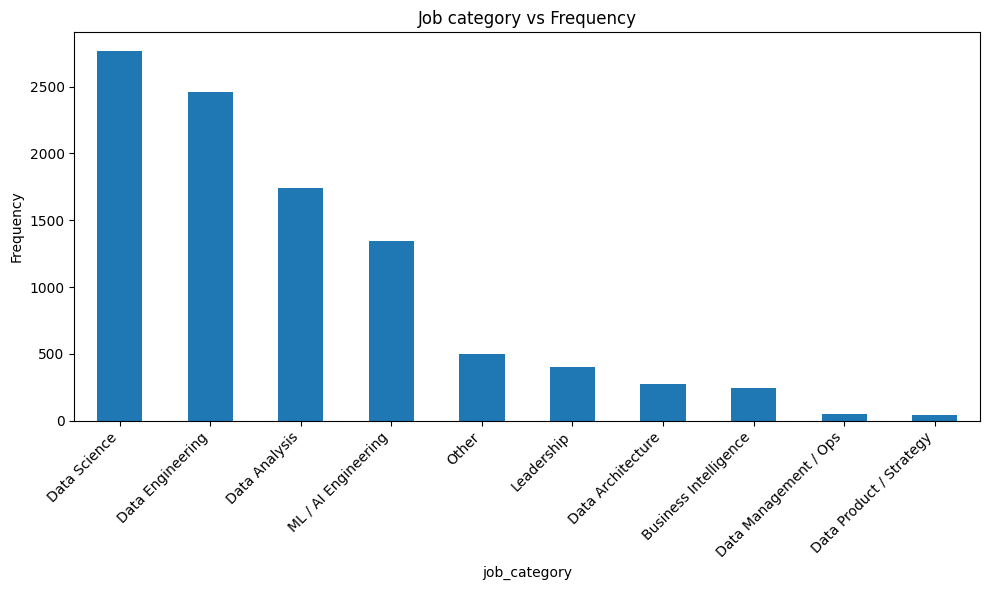

In [93]:
job_counts_per_category = df['job_category'].value_counts()

plt.figure(figsize=(10, 6))
job_counts_per_category.plot(kind='bar')
# plt.xlabel("Job Title")
plt.ylabel("Frequency")
plt.title("Job category vs Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

### salary as per job title

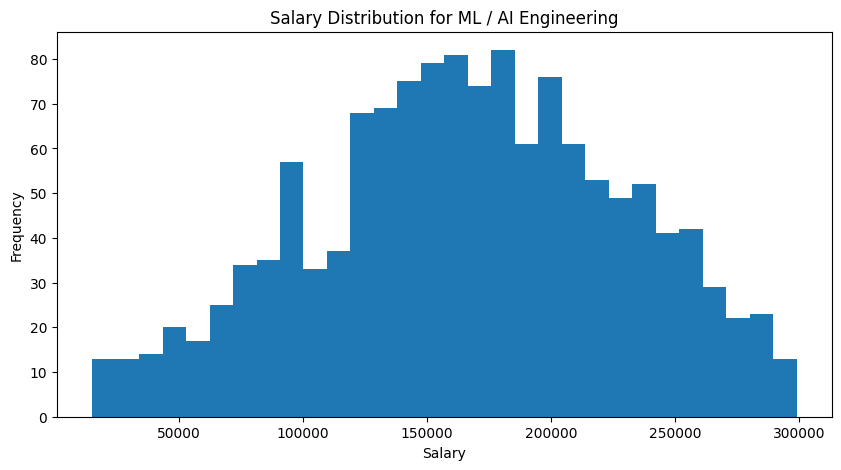

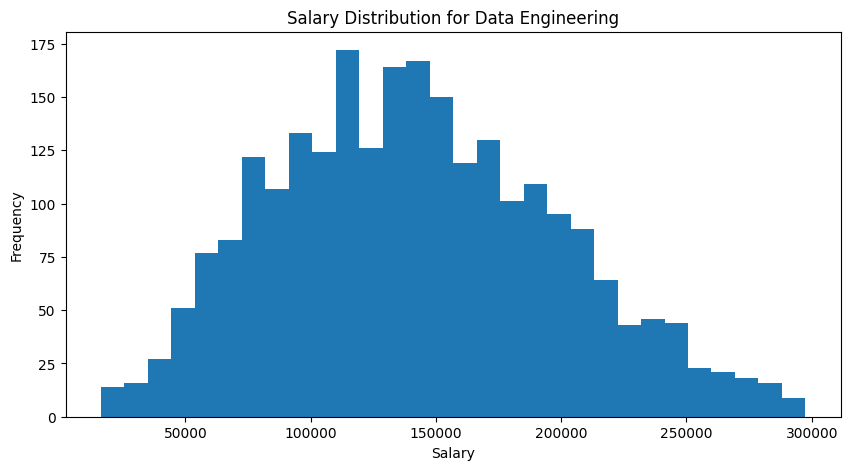

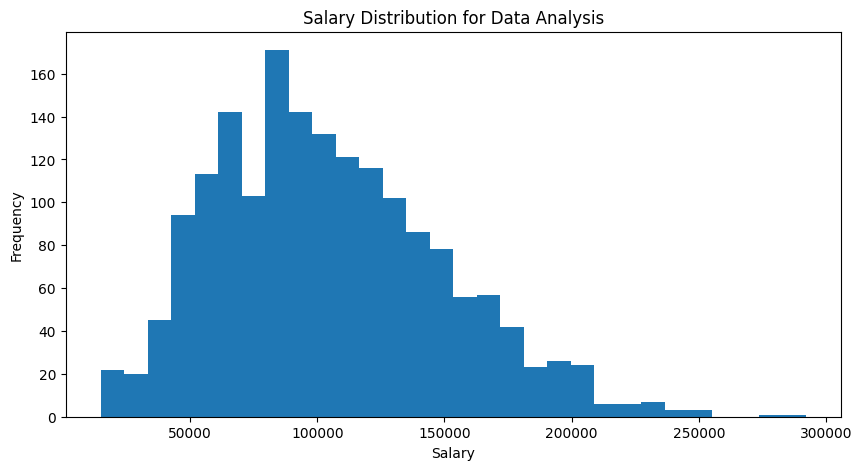

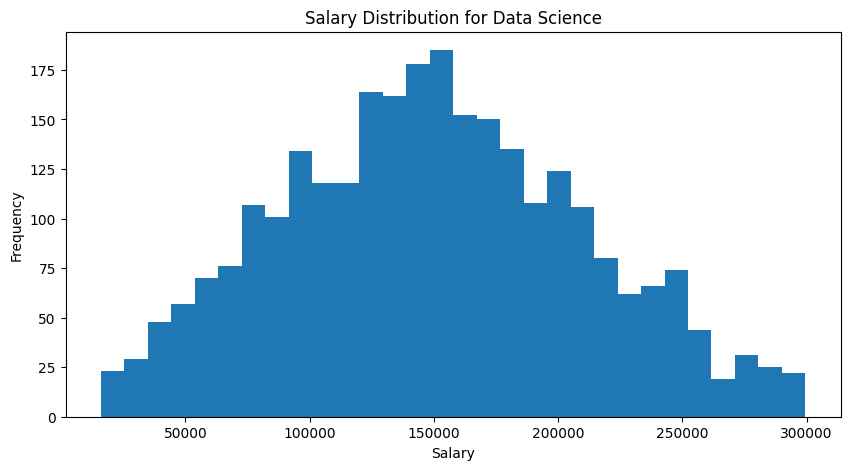

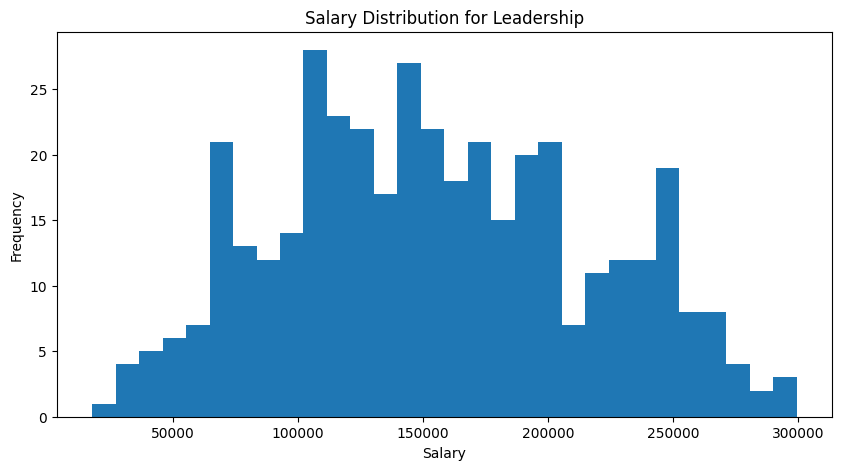

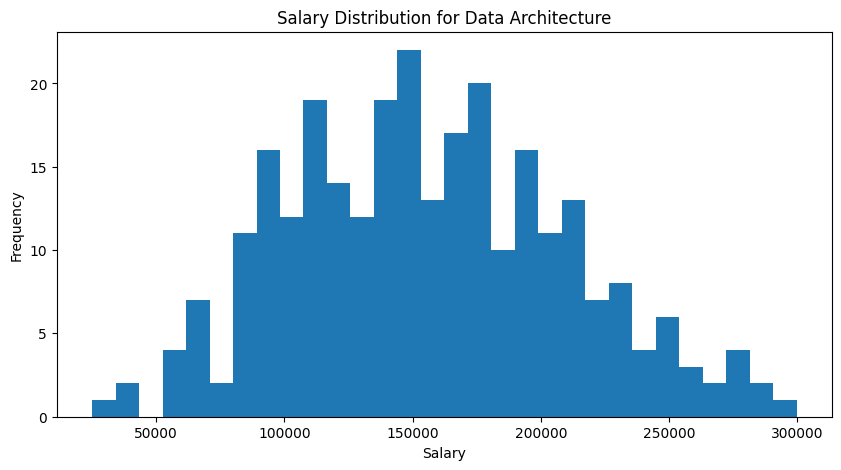

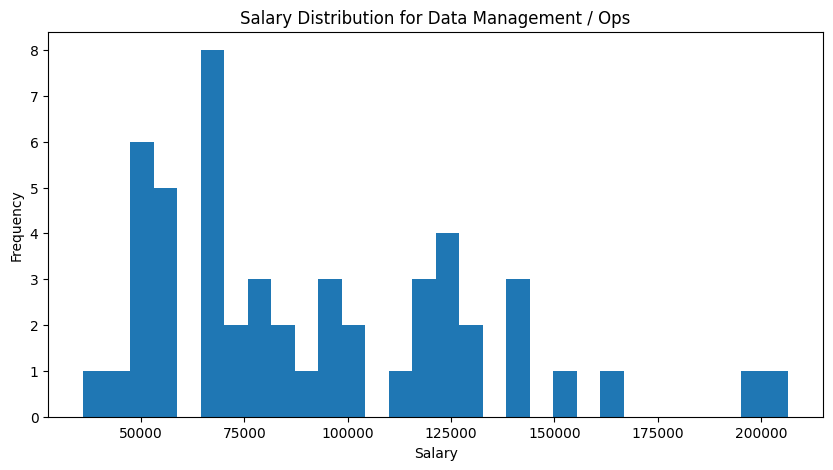

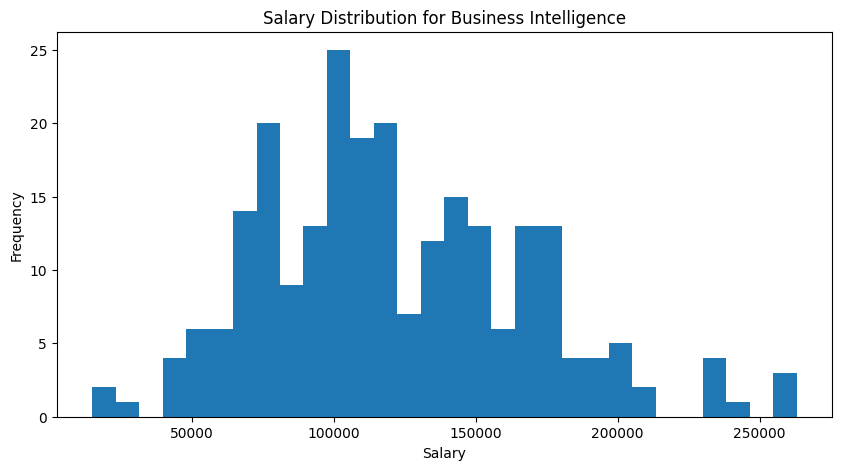

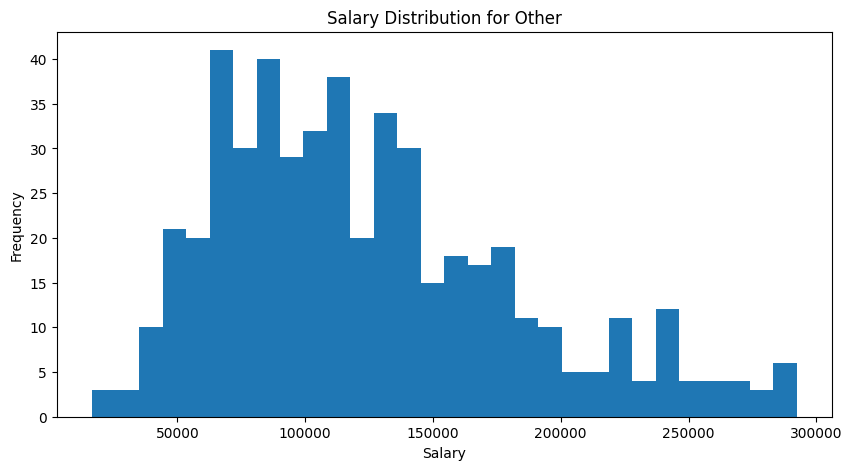

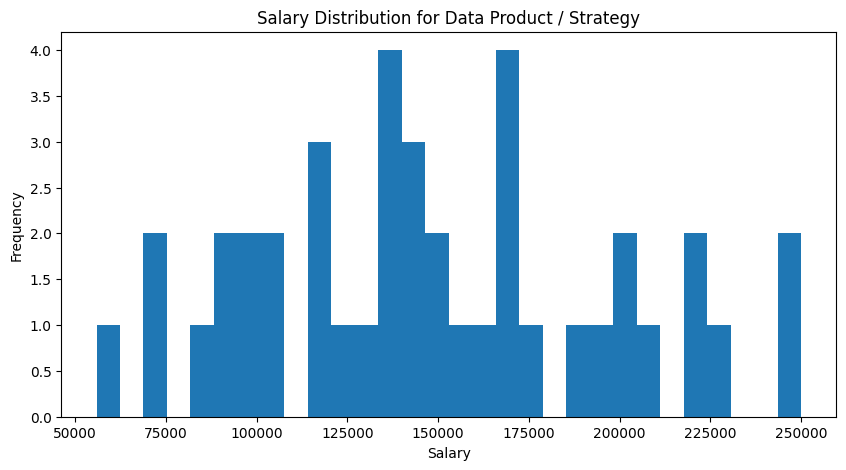

In [94]:
def print_histogram(title):
    new_df = df[df['job_category'] == title]
    # new_df['salary_in_usd'].describe()

    plt.figure(figsize=(10,5))
    plt.hist(new_df['salary_in_usd'], bins=30)
    plt.xlabel("Salary")
    plt.ylabel("Frequency")
    plt.title(f"Salary Distribution for {title}")
    plt.show()

for i in df['job_category'].unique():
    print_histogram(i)

### underastand Salary

In [95]:
df['salary_in_usd'].describe()

count      9830.00000
mean     140198.86704
std       60029.84077
min       15000.00000
25%       94262.50000
50%      136000.00000
75%      180000.00000
max      299792.00000
Name: salary_in_usd, dtype: float64

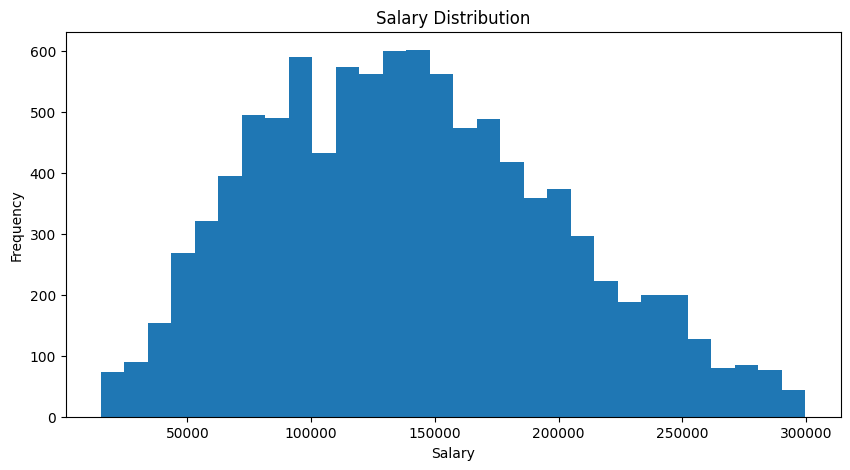

In [96]:
plt.figure(figsize=(10,5))
plt.hist(df['salary_in_usd'], bins=30)
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Salary Distribution")
plt.show()

### understand employee_residence

In [97]:
df['employee_residence'].unique()

array(['US', 'AU', 'GB', 'CA', 'NL', 'LT', 'DK', 'FR', 'ZA', 'NZ', 'AR',
       'ES', 'KE', 'LV', 'GE', 'IN', 'DE', 'IL', 'FI', 'AT', 'HR', 'BR',
       'CH', 'AE', 'GR', 'PL', 'SA', 'UA', 'EG', 'PH', 'TR', 'OM', 'MX',
       'PT', 'BA', 'IT', 'IE', 'EE', 'MT', 'LB', 'RO', 'HU', 'VN', 'NG',
       'CZ', 'PK', 'UG', 'CO', 'SI', 'MU', 'AM', 'TH', 'KR', 'RU', 'TN',
       'GH', 'BE', 'AD', 'EC', 'PE', 'MD', 'NO', 'UZ', 'JP', 'HK', 'CF',
       'SG', 'SE', 'KW', 'CY', 'IR', 'AS', 'CN', 'CR', 'CL', 'PR', 'BO',
       'DO', 'ID', 'MY', 'HN', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'LU'],
      dtype=object)

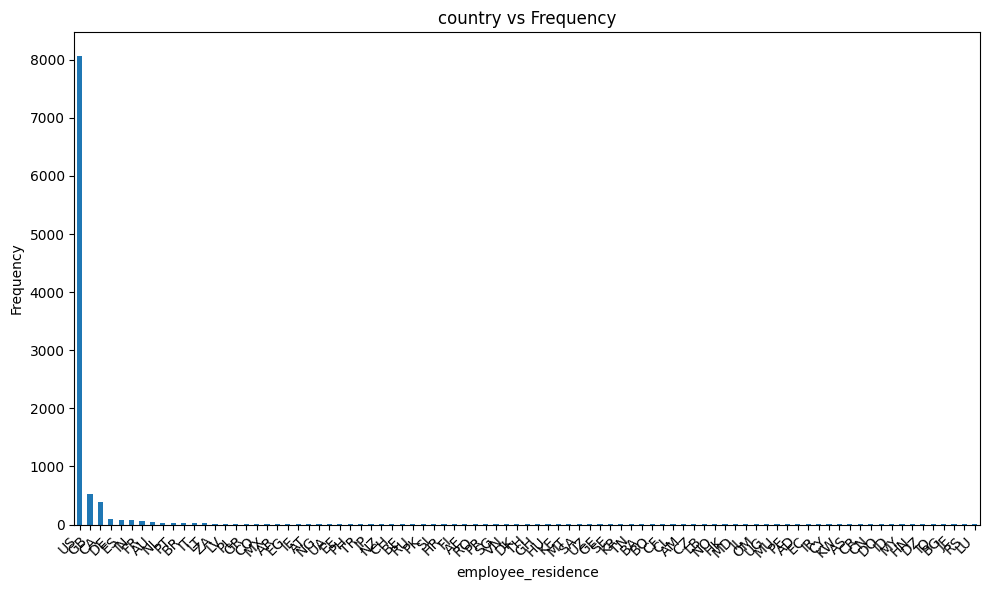

In [98]:
employee_residence_count = df['employee_residence'].value_counts()

plt.figure(figsize=(10, 6))
employee_residence_count.plot(kind='bar')
# plt.xlabel("Job Title")
plt.ylabel("Frequency")
plt.title("country vs Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [99]:
employee_residence_count.describe()

count      87.000000
mean      112.988506
std       865.663833
min         1.000000
25%         1.000000
50%         4.000000
75%        12.000000
max      8068.000000
Name: count, dtype: float64

In [100]:
df['employee_residence'].value_counts()

employee_residence
US    8068
GB     525
CA     392
DE      97
ES      78
      ... 
IQ       1
BG       1
JE       1
RS       1
LU       1
Name: count, Length: 87, dtype: int64

update all of the employee_residence to other except for countries US, GB, CA, DE

In [101]:
allowed = ['US', 'GB', 'CA', 'DE']
def change_country_to_other(country):
    if country not in allowed:
        return 'other'
    else:
        return country

df['employee_residence'] = df['employee_residence'].apply(change_country_to_other)

df['employee_residence'].value_counts()

C:\Users\Yadnesh\AppData\Local\Temp\ipykernel_17896\2985547671.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['employee_residence'] = df['employee_residence'].apply(change_country_to_other)


employee_residence
US       8068
other     748
GB        525
CA        392
DE         97
Name: count, dtype: int64

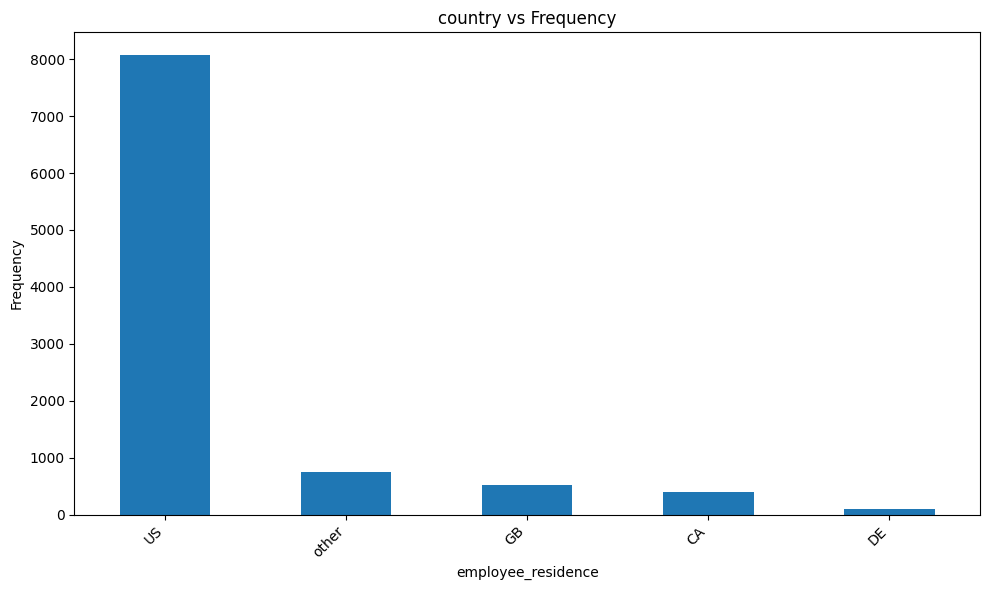

In [102]:
employee_residence_count_with_other = df['employee_residence'].value_counts()

plt.figure(figsize=(10, 6))
employee_residence_count_with_other.plot(kind='bar')
# plt.xlabel("Job Title")
plt.ylabel("Frequency")
plt.title("country vs Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

### understand remote_ratio

In [103]:
df['remote_ratio'].unique()

array([  0, 100,  50])

In [104]:
df['remote_ratio'].value_counts()

remote_ratio
0      6186
100    3401
50      243
Name: count, dtype: int64

### understand relation with salary

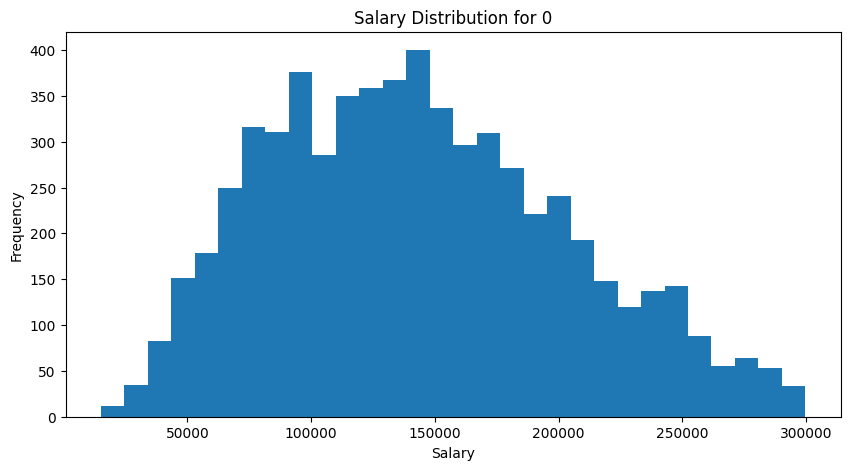

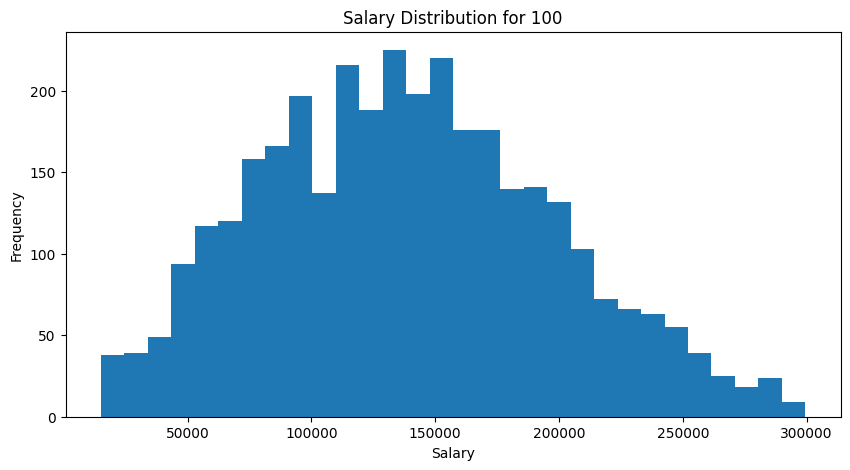

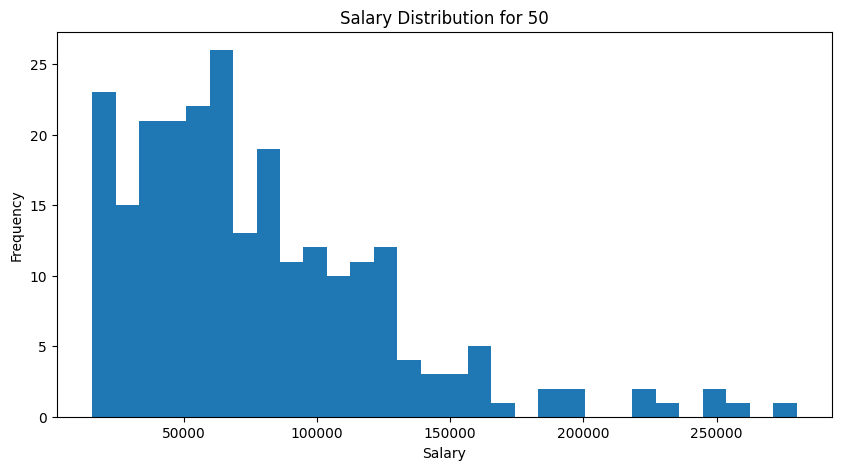

In [105]:
def print_histogram(ration):
    new_df = df[df['remote_ratio'] == ration]
    # new_df['salary_in_usd'].describe()

    plt.figure(figsize=(10,5))
    plt.hist(new_df['salary_in_usd'], bins=30)
    plt.xlabel("Salary")
    plt.ylabel("Frequency")
    plt.title(f"Salary Distribution for {ration}")
    plt.show()

for i in df['remote_ratio'].unique():
    print_histogram(i)

### understand company_location

In [106]:
df['company_location'].unique()

array(['US', 'AU', 'GB', 'CA', 'NL', 'LT', 'DK', 'FR', 'ZA', 'NZ', 'AR',
       'ES', 'KE', 'LV', 'IN', 'DE', 'IL', 'FI', 'AT', 'BR', 'CH', 'AE',
       'PL', 'SA', 'UA', 'EG', 'PH', 'TR', 'OM', 'MX', 'PT', 'BA', 'IT',
       'AS', 'IE', 'EE', 'MT', 'HU', 'LB', 'RO', 'VN', 'NG', 'LU', 'GI',
       'CO', 'SI', 'GR', 'MU', 'RU', 'KR', 'CZ', 'GH', 'SE', 'AD', 'EC',
       'NO', 'JP', 'HK', 'CF', 'SG', 'TH', 'HR', 'AM', 'PK', 'IR', 'BS',
       'PR', 'BE', 'ID', 'MY', 'HN', 'DZ', 'IQ', 'CN', 'CL', 'MD'],
      dtype=object)

In [107]:
df['company_location'].value_counts()

company_location
US    8118
GB     533
CA     394
DE     104
ES      74
      ... 
DZ       1
IQ       1
CN       1
CL       1
MD       1
Name: count, Length: 76, dtype: int64

In [108]:
df['company_location'].value_counts().describe()

count      76.000000
mean      129.342105
std       931.682901
min         1.000000
25%         2.000000
50%         4.000000
75%        12.000000
max      8118.000000
Name: count, dtype: float64

In [109]:
df['company_location'].value_counts().head(8)

company_location
US    8118
GB     533
CA     394
DE     104
ES      74
FR      64
IN      63
AU      52
Name: count, dtype: int64

remave all the country to other except US, GB, CA, DE

In [110]:
allowed_location = ['US', 'GB', 'CA', 'DE']
def change_company_location_to_other(company_location):
    if company_location not in allowed_location:
        return 'other'
    else:
        return company_location

df['company_location'] = df['company_location'].apply(change_company_location_to_other)

df['company_location'].value_counts()

C:\Users\Yadnesh\AppData\Local\Temp\ipykernel_17896\2938356512.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company_location'] = df['company_location'].apply(change_company_location_to_other)


company_location
US       8118
other     681
GB        533
CA        394
DE        104
Name: count, dtype: int64

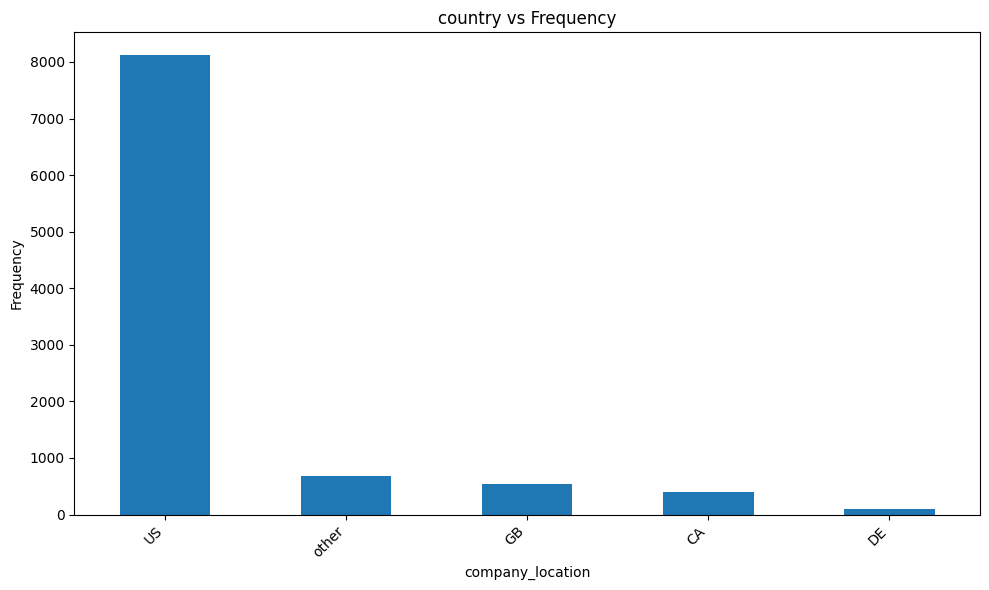

In [111]:
company_location_count_with_other = df['company_location'].value_counts()

plt.figure(figsize=(10, 6))
company_location_count_with_other.plot(kind='bar')
# plt.xlabel("Job Title")
plt.ylabel("Frequency")
plt.title("country vs Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

### Undestand company_size

In [112]:
df['company_size'].unique()

array(['M', 'L', 'S'], dtype=object)

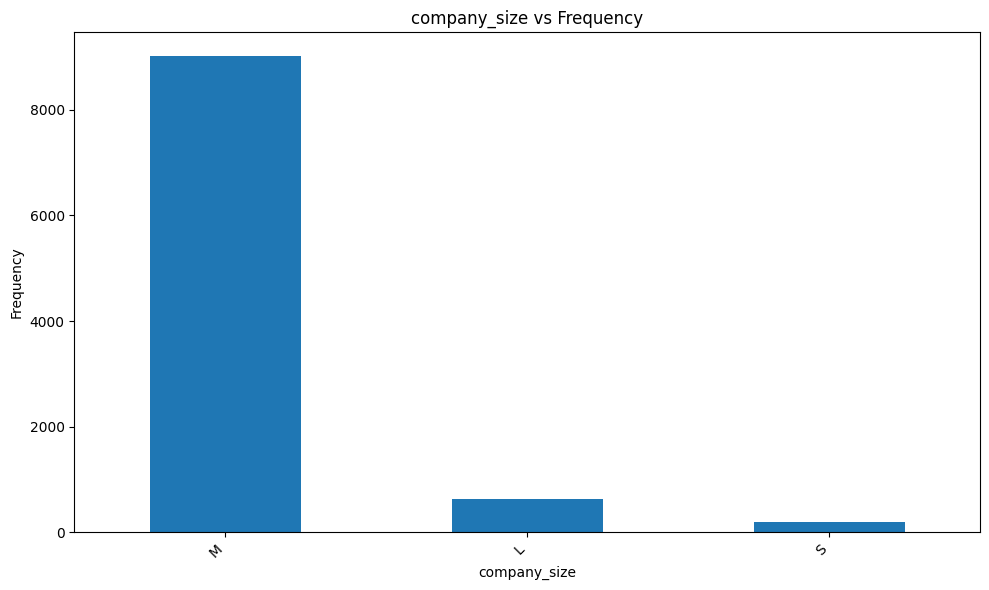

In [113]:
size_count = df['company_size'].value_counts()

plt.figure(figsize=(10, 6))
size_count.plot(kind='bar')
# plt.xlabel("Job Title")
plt.ylabel("Frequency")
plt.title("company_size vs Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# featured enginerring

In [114]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M,ML / AI Engineering
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M,ML / AI Engineering
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M,Data Engineering
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M,Data Engineering
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M,ML / AI Engineering


columns we dont want
- salary(as per local curancy)
- salary_currency (we have salary in usd column)
- job title (mostly work with job job_category)
- employment_type (moslt we have data for FT therefor other classes are not affecting)

In [115]:
df = df.drop(['work_year','salary', 'salary_currency', 'job_title', 'employment_type', 'employee_residence','remote_ratio'], axis=1)
df.head()

,experience_level,salary_in_usd,company_location,company_size,job_category
0,SE,202730,US,M,ML / AI Engineering
1,SE,92118,US,M,ML / AI Engineering
2,SE,130500,US,M,Data Engineering
3,SE,96000,US,M,Data Engineering
4,SE,190000,US,M,ML / AI Engineering


### Divide independent and dependent features

In [116]:
x = df.drop(['salary_in_usd'],axis=1)
y = df['salary_in_usd']

### Train test split

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

### Encoding

In [119]:
from sklearn.preprocessing import OneHotEncoder

In [120]:
encoder = OneHotEncoder(sparse_output=False)

In [121]:
encoder.fit(x[['experience_level','company_location','company_size', 'job_category']])

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [122]:
encoder.categories_

[array(['EN', 'EX', 'MI', 'SE'], dtype=object),
 array(['CA', 'DE', 'GB', 'US', 'other'], dtype=object),
 array(['L', 'M', 'S'], dtype=object),
 array(['Business Intelligence', 'Data Analysis', 'Data Architecture',
        'Data Engineering', 'Data Management / Ops',
        'Data Product / Strategy', 'Data Science', 'Leadership',
        'ML / AI Engineering', 'Other'], dtype=object)]

### Column transformer

In [123]:
from sklearn.compose import make_column_transformer

In [124]:
transform_col = make_column_transformer((OneHotEncoder(categories=encoder.categories_),['experience_level','company_location','company_size', 'job_category']),remainder="passthrough")

In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline

### liner regrassion

In [126]:
reg = LinearRegression()

In [138]:
pipeline_liner_reg = make_pipeline(transform_col, reg)

In [139]:
pipeline_liner_reg.fit(x_train,y_train)

,steps,"[('columntransformer', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [140]:
y_pres = pipeline_liner_reg.predict(x_test)

In [141]:
r2_score(y_test,y_pred)

0.36021088093458065

### random forest 

In [134]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

In [146]:
pipeline_random_forest = make_pipeline(transform_col,random_forest_model)

In [147]:
pipeline_random_forest.fit(x_train, y_train)

,steps,"[('columntransformer', ...), ('randomforestregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [148]:
y_pred = pipeline_random_forest.predict(x_test)

In [149]:
r2_score(y_test,y_pred)

0.3587726384965839

### Decision tree

In [150]:
from sklearn.tree import DecisionTreeRegressor

In [178]:
decision_tree_model = DecisionTreeRegressor(
    max_depth=None,        # optional: control tree depth
    min_samples_split=10,  # optional: control splitting
    random_state=42
)

In [179]:
pipeline_decision_tree = make_pipeline(transform_col,decision_tree_model)

In [180]:
pipeline_decision_tree.fit(x_test, y_test)

,steps,"[('columntransformer', ...), ('decisiontreeregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [181]:
y_pred = pipeline_decision_tree.predict(x_test)

In [182]:
r2_score(y_test,y_pred)

0.4042425099856052

### KNN regessor

In [192]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [196]:
knn_model = KNeighborsRegressor(
        n_neighbors=5,      # default k
        weights='distance', # optional: closer points have more influence
        p=2                 # p=2 → Euclidean distance
    )

In [197]:
pipeline_knn = make_pipeline(transform_col,knn_model)

In [198]:
pipeline_knn.fit(x_train, y_train)

,steps,"[('columntransformer', ...), ('kneighborsregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [199]:
y_pred = pipeline_knn.predict(x_test)

In [200]:
r2_score(y_test,y_pred)

0.17102063059489647

### Hyperpermeter tunning for decision tree

In [201]:
from sklearn.model_selection import GridSearchCV

In [202]:
param_grid = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": [None, "sqrt", "log2"],
}

In [203]:
grid = GridSearchCV(
    estimator=decision_tree_model,
    param_grid=param_grid,
    cv=5,                  # 5-fold cross-validation
    scoring="neg_mean_squared_error",
    n_jobs=-1,             # use all CPU cores
    verbose=1
)

In [204]:
grib_pipeline = make_pipeline(transform_col, grid)

In [205]:
grib_pipeline.fit(x_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


,steps,"[('columntransformer', ...), ('gridsearchcv', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [206]:
y_pred = grib_pipeline.predict(x_test)

In [207]:
r2_score(y_test,y_pred)

0.3597103275579201